In [2]:
import os.path
import json
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt

In [65]:
class Checker:
    def __init__(self, resolution, tile_size):
        self.resolution = resolution
        self.tile_size = tile_size
        self.output = self.draw()
        

    def draw(self):
        Img_H = self.resolution
        tile_H = self.tile_size
        if Img_H % (2*tile_H) == 0:
            tb = np.zeros((tile_H, tile_H))
            tw = np.ones((tile_H, tile_H))
            self.output = np.tile(np.concatenate((np.concatenate((tb, tw), axis=1), np.concatenate((tw, tb), axis=1)) ,axis=0),(Img_H//(2*tile_H),Img_H//(2*tile_H))).astype('float64')
            return np.copy(self.output)
        else:
            return print("Error: Resolution must be evenly dividable by 2*tile size in each dimention")

    def show(self):
        if self.resolution % (2*self.tile_size) == 0:
            plt.imshow(self.output, cmap=plt.cm.gray)
            plt.show()
        else:
            return print("Error: Resolution must be evenly dividable by 2*tile size in each dimention")

        
        
class Color_Spectrum:
    def __init__(self, resolution):
        self.resolution = resolution
        self.output = self.draw()

    def draw(self):
        spec_H = self.resolution
        rgbArray = np.zeros((spec_H,spec_H,3))
        rgbArray[:,:,0] = np.tile(np.linspace(0, 1, spec_H), (spec_H,1))
        rgbArray[:,:,1] = np.tile(np.linspace(0, 1, spec_H), (spec_H,1)).T
        rgbArray[:,:,2] = np.flip(rgbArray[:,:,0])
        self.output = rgbArray
              
        return np.copy(self.output)

    def show(self):
        plt.imshow(self.output)
        plt.show()
        
class Circle:
    def __init__(self, resolution, radius, position):
        self.resolution = resolution
        self.radius = radius
        self.position = position
        self.output = self.draw()

    def draw(self):
        spec_H = self.resolution
        r = self.radius
        (cx, cy) = self.position
        X = np.tile(np.arange(0,spec_H,1), (spec_H,1))
        Y = np.tile(np.arange(0,spec_H,1), (spec_H,1)).T
        C = lambda x, y: (x-cx)**2 + (y-cy)**2 - r**2
        s = np.sign(C(X,Y))
        s[s == -1] = 0
        self.output = np.invert(s)+2
              
        return np.copy(self.output)

    def show(self):
        plt.imshow(self.output, cmap=plt.cm.gray)
        plt.show()


In [66]:
r = (100, 150)
t = (10,15)
ch = Checker(100,10)

In [51]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [52]:
ch.draw()

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

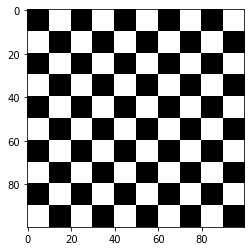

In [67]:
ch.show()

In [59]:
cs = Color_Spectrum(200)

In [60]:
cs.draw()

array([[[0.        , 0.        , 1.        ],
        [0.00502513, 0.        , 0.99497487],
        [0.01005025, 0.        , 0.98994975],
        ...,
        [0.98994975, 0.        , 0.01005025],
        [0.99497487, 0.        , 0.00502513],
        [1.        , 0.        , 0.        ]],

       [[0.        , 0.00502513, 1.        ],
        [0.00502513, 0.00502513, 0.99497487],
        [0.01005025, 0.00502513, 0.98994975],
        ...,
        [0.98994975, 0.00502513, 0.01005025],
        [0.99497487, 0.00502513, 0.00502513],
        [1.        , 0.00502513, 0.        ]],

       [[0.        , 0.01005025, 1.        ],
        [0.00502513, 0.01005025, 0.99497487],
        [0.01005025, 0.01005025, 0.98994975],
        ...,
        [0.98994975, 0.01005025, 0.01005025],
        [0.99497487, 0.01005025, 0.00502513],
        [1.        , 0.01005025, 0.        ]],

       ...,

       [[0.        , 0.98994975, 1.        ],
        [0.00502513, 0.98994975, 0.99497487],
        [0.01005025, 0

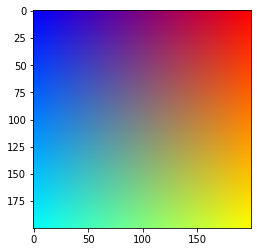

In [61]:
cs.show()

In [53]:
res = 200
r = 70
P = (150, 125)

c = Circle(res, r, P)

In [54]:
c.draw()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

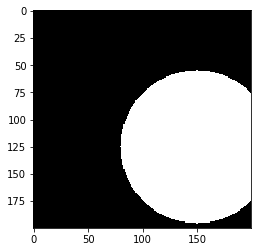

In [55]:
c.show()